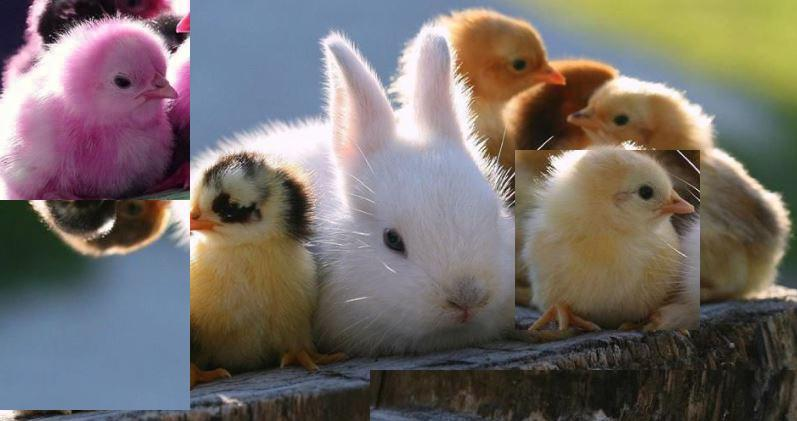

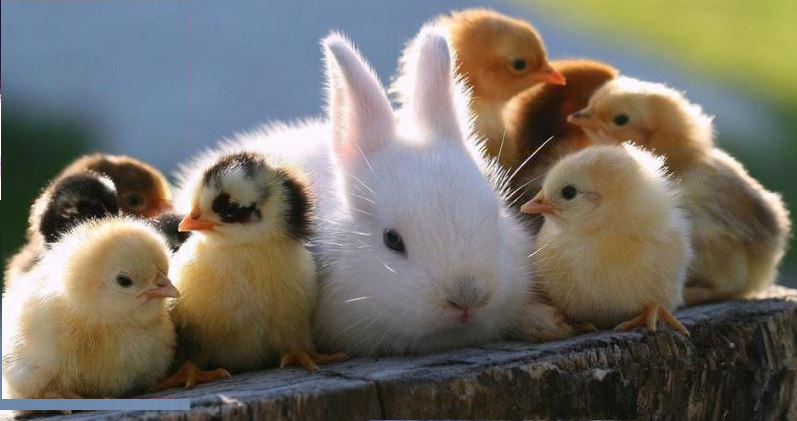

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Reading the image
initial_image = cv.imread('jigsaw.jpg')

# Displaying the original image
cv2_imshow(initial_image)
cv.waitKey(0)

# Getting the dimensions of the image
initial_image.shape
breadth = initial_image.shape[1]
length = initial_image.shape[0]

# Creating a copy of the image for intermediate and final results
pre_initial_image = np.array(initial_image, copy=True)
final_initial_image = np.array(initial_image, copy=True)

# Step 1: Removing a vertical line
pre_initial_image[:, (breadth//4 - 1 - 10) : (breadth//4 + 1 - 10)] = np.array([0, 0, 0])

left_top_right_x = breadth//4 - 10

# Step 2: Removing a horizontal line
pre_initial_image = np.array(initial_image, copy=True)
pre_initial_image[(length//2 - 1 - 10) : (length//2 + 1 - 10), :] = np.array([0, 0, 0])

left_top_bottom_y = length//2 - 10

# Step 3: Removing a bottom border
pre_initial_image = np.array(initial_image, copy=True)
pre_initial_image[(length - 1 - 10) : (length-9), :] = np.array([0, 0, 0])

left_bottom_bottom_y = length - 12

# Step 4: Rearranging a puzzle piece
pre = np.array(initial_image[(left_top_bottom_y):left_bottom_bottom_y+1, 0:left_top_right_x], copy=True)
pre_length = pre.shape[0]
pre_breadth = pre.shape[1]

for i in range(0, pre_length):
  for j in range(0, pre_breadth):
    final_initial_image[i, j+1] = pre[pre_length-i-1, j]

# Additional steps can be added here to solve the rest of the puzzle
pre = np.array(initial_image[0:left_top_bottom_y, 0:left_top_right_x], copy = True)
pre2 = np.array(initial_image[0:left_top_bottom_y, 0:left_top_right_x], copy = True)
pre[:, :, 1] = pre2[:, :, 0]
pre[:, :, 0] = pre2[:, :, 1]
final_initial_image[(left_bottom_bottom_y - left_top_bottom_y-10):left_bottom_bottom_y-10, 2:left_top_right_x+2] = pre

pre_initial_image = np.array(initial_image, copy = True)
pre_initial_image[(7*length//8 + 2):(7*length//8 + 3), :] = np.array([0, 0, 0])

bottom_middle_top_y = 7*length//8 + 2

pre_initial_image = np.array(initial_image, copy = True)
pre_initial_image[:, (breadth//2 -1 - 28) : (breadth//2 +1-28)] = np.array([0, 0, 0])

bottom_middle_left_x = (breadth//2 - 28)

pre_initial_image = np.array(initial_image, copy = True)
pre_initial_image[:, (4*breadth//5) : (4*breadth//5 +1)] = np.array([0, 0, 0])

bottom_middle_right_x = 4*breadth//5




pre = np.array(initial_image[bottom_middle_top_y:(length-1), bottom_middle_left_x: bottom_middle_right_x], copy = True)

pre_breadth = pre.shape[1]
pre_length = pre.shape[0]

for i in range(0, pre_length):
  for j in range(0, pre_breadth):
    final_initial_image[bottom_middle_top_y+i, bottom_middle_left_x+j] = pre[pre_length-1-i ,j]


pre_initial_image = np.array(initial_image, copy = True)
pre_initial_image[(length//3 + 10):(length//3 + 11), :] = np.array([0, 0, 0])

yellow_top_y = length//3 + 10

pre_initial_image = np.array(initial_image, copy = True)
pre_initial_image[:, (2*breadth//3 - 16):(2*breadth//3-15)] = np.array([0, 0, 0])

yellow_left_x = 2*breadth//3 - 16

pre_initial_image = np.array(initial_image, copy = True)
pre_initial_image[:, (7*breadth//8 + 2):(7*breadth//8 + 3)] = np.array([0, 0, 0])


yellow_right_x = 7*breadth//8 + 3


pre_initial_image = np.array(initial_image, copy = True)
pre_initial_image[(3*length//4 + 15):(3*length//4 + 16), :] = np.array([0, 0, 0])

yellow_bottom_y = 3*length//4 + 15


# Displaying the final solved puzzle image

pre = np.array(initial_image[yellow_top_y: yellow_bottom_y, yellow_left_x: yellow_right_x], copy = True)

pre_breadth = pre.shape[1]
pre_length = pre.shape[0]

for i in range(0, pre_length):
  for j in range(0, pre_breadth):
    final_initial_image[(yellow_top_y + i), (yellow_left_x + j)] = pre[i,(pre_breadth - 1 - j)]

print("\n\n\n\n")
cv2_imshow(final_initial_image)
cv.waitKey(0)

# Finding the maximum pixel value in the final image
max_pixel_value = np.max(final_initial_image[:, :])

cv.destroyAllWindows()
